# Payment Date Prediction 


### Importing related Libraries 

In [1]:
# pip install tensorflow

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from currency_converter import CurrencyConverter

import tensorflow as tf

### Storing the dataset into the Dataframe


In [3]:
df=pd.read_csv('dataset.csv')

### Shape of the dataframe


In [4]:
df.shape

(50099, 19)

###  Detailed information of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50099 entries, 0 to 50098
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50099 non-null  object 
 1   cust_number             50099 non-null  object 
 2   name_customer           50099 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50099 non-null  int64  
 5   doc_id                  50099 non-null  int64  
 6   posting_date            50099 non-null  object 
 7   document_create_date    50099 non-null  int64  
 8   document_create_date.1  50099 non-null  int64  
 9   due_in_date             50099 non-null  int64  
 10  invoice_currency        50099 non-null  object 
 11  document type           50099 non-null  object 
 12  posting_id              50099 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50099 non-null

### All Column Names

In [6]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Description of the entire dataset

In [7]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50099.000000,5.009900e+04,5.009900e+04,5.009900e+04,5.009900e+04,50099.0,0.0,50099.000000,5.009900e+04,5.009300e+04,50099.000000
mean,2019.307072,2.014112e+09,2.019353e+07,2.019355e+07,2.019369e+07,1.0,NaN,32456.565546,2.019355e+07,2.013216e+09,0.201581
std,0.461284,2.912992e+08,4.501712e+03,4.487779e+03,4.475909e+03,0.0,NaN,39259.249400,4.488339e+03,2.795573e+08,0.401185
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929343e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4943.480000,2.019051e+07,1.929343e+09,0.000000
50%,2019.000000,1.929968e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17700.000000,2.019091e+07,1.929968e+09,0.000000
75%,2020.000000,1.930621e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47385.590000,2.020013e+07,1.930621e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Displaying top 5 records from the dataset

In [8]:
df[:5]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Displaying the Null values percentage against every columns (comparison to the total number of records)

- Observed Output : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [9]:
df.isnull().mean()*100

business_code               0.000000
cust_number                 0.000000
name_customer               0.000000
clear_date                 20.158087
buisness_year               0.000000
doc_id                      0.000000
posting_date                0.000000
document_create_date        0.000000
document_create_date.1      0.000000
due_in_date                 0.000000
invoice_currency            0.000000
document type               0.000000
posting_id                  0.000000
area_business             100.000000
total_open_amount           0.000000
baseline_create_date        0.000000
cust_payment_terms          0.000000
invoice_id                  0.011976
isOpen                      0.000000
dtype: float64

### Displaying Invoice_id and Doc_Id

- Observation - Many of the would have same invoice_id and doc_id


In [10]:
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
50094,2.960619e+09,2960618884
50095,2.960619e+09,2960618885
50096,2.960619e+09,2960618886
50097,2.960619e+09,2960618887


#### Code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [11]:
df[['baseline_create_date','document_create_date','document_create_date.1']]

,baseline_create_date,document_create_date,document_create_date.1
0,20200126,20200125,20200126
1,20190722,20190722,20190722
2,20190914,20190914,20190914
3,20200331,20200330,20200330
4,20191113,20191113,20191113
...,...,...,...
50094,20200306,20200306,20200306
50095,20200306,20200306,20200306
50096,20200306,20200306,20200306
50097,20200306,20200306,20200306


In [12]:
# pip install CurrencyConverter

#### Please check, Column 'posting_id' is constant columns or not

- Please note, Constants Values

In [13]:
df['posting_id'].value_counts() 

1    50099
Name: posting_id, dtype: int64

#### Please check 'isOpen' is a constant column and relevant column for this project or not

- Please note, Two Distinct values

In [14]:
df['isOpen'].value_counts()

0    40000
1    10099
Name: isOpen, dtype: int64

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [15]:
df.drop(columns=['area_business', 'posting_id', 'invoice_id', 'document_create_date', 'isOpen', 'document type', 'document_create_date.1'], inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [16]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [17]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49963,U001,200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,10968.24,20190113,NAH4
49986,U001,200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,155837.53,20190529,NAU5
49990,U001,200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,4008.05,20190522,NAA8
49991,U001,200704045,RA trust,25-10-2019 00:00,2019,1930001131,10-10-2019,20191025,USD,73002.24,20191010,NAA8


### Display the Number of Duplicate Rows

In [18]:
len(df[df.duplicated()])

1162

### Drop all the Duplicate Rows

In [19]:
df.drop_duplicates(inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [20]:
len(df[df.duplicated()])

0

### Check for the number of Rows and Columns in your dataset

In [21]:
df.shape

(48937, 12)

### Find out the total count of null values in each columns

In [22]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9779
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

# Data type Conversion 

### Please check the data type of each column of the dataframe

In [23]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [24]:
print(df.clear_date.dtypes)
print(df.posting_date.dtypes)
print(df.due_in_date.dtypes)
print(df.baseline_create_date.dtypes)

object
object
int64
int64


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [25]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')

In [26]:
df['posting_date'].describe()

count                   48937
unique                    506
top       2020-06-03 00:00:00
freq                      273
first     2018-12-30 00:00:00
last      2020-12-05 00:00:00
Name: posting_date, dtype: object

In [27]:
df['clear_date'].describe()

count                   39158
unique                    403
top       2019-12-11 00:00:00
freq                      299
first     2019-01-02 00:00:00
last      2020-12-03 00:00:00
Name: clear_date, dtype: object

In [28]:
df['due_in_date'].describe()

count                   48937
unique                    547
top       2020-04-08 00:00:00
freq                      249
first     2018-12-24 00:00:00
last      2020-07-10 00:00:00
Name: due_in_date, dtype: object

In [29]:
df['baseline_create_date'].describe()

count                   48937
unique                    506
top       2020-04-01 00:00:00
freq                      267
first     2018-12-14 00:00:00
last      2020-05-22 00:00:00
Name: baseline_create_date, dtype: object

### Please check the datatype of all the columns after conversion of the above 4 columns

In [30]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [31]:
cad=df[df['invoice_currency'] == 'CAD'].count()['invoice_currency']
usd=df[df['invoice_currency'] == 'USD'].count()['invoice_currency']

#### display the "total_open_amount" column value

In [32]:
df['total_open_amount'].dtype

dtype('float64')

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [33]:
df['invoice_currency'].unique()

array(['USD', 'CAD'], dtype=object)

In [34]:
all_currency=df['invoice_currency'].unique()
currency_convertion_rate = {}
unavailable_currency = []
for i in all_currency:
    if i in list(CurrencyConverter().currencies):
        currency_convertion_rate[i] = CurrencyConverter().convert(1,i,'USD')
    else:
        unavailable_currency.append(i)
unavailable_currency

[]

In [35]:
currency_convertion_rate

{'USD': 1.0, 'CAD': 0.7461018352421691}

In [36]:
df['converted_usd'] = df.apply(lambda x : x['total_open_amount']*currency_convertion_rate[x['invoice_currency']],axis=1)

### Display the new "converted_usd" column values

In [37]:
df.converted_usd

0        54273.280000
1        79656.600000
2         2253.860000
3         2461.912226
4        33133.290000
             ...     
50094    69262.327017
50095    69262.327017
50096    69262.327017
50097    69262.327017
50098    69262.327017
Name: converted_usd, Length: 48937, dtype: float64

In [38]:
df[['total_open_amount','converted_usd']]

,total_open_amount,converted_usd
0,54273.28,54273.280000
1,79656.60,79656.600000
2,2253.86,2253.860000
3,3299.70,2461.912226
4,33133.29,33133.290000
...,...,...
50094,92832.27,69262.327017
50095,92832.27,69262.327017
50096,92832.27,69262.327017
50097,92832.27,69262.327017


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [39]:
df['buisness_year'].value_counts()

2019    33975
2020    14962
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [40]:
df.drop(columns=['invoice_currency', 'total_open_amount'], inplace=True)

### Write a code to check the number of columns in dataframe

In [41]:
len(df.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [42]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9779
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

#### Find out the number of null values from the column that you got from the above code

In [43]:
df['clear_date'].isnull().sum()

9779

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [44]:
maindata=df.loc[df['clear_date'].notnull()]
nulldata=df.loc[df['clear_date'].isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [45]:
maindata.shape

(39158, 11)

In [46]:
nulldata.shape

(9779, 11)

### Display the 5 records from maindata and nulldata dataframes

In [47]:
maindata[:5]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280000
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600000
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860000
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290000
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,16582.740014


In [48]:
nulldata[:5]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2461.912226
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020000
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590000
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650000
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060000


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [49]:
maindata['Delay']=maindata['clear_date']-maindata['due_in_date']
maindata.Delay

0        266 days
1         -3 days
2         92 days
4         -3 days
5       -175 days
           ...   
49994      0 days
49996   -174 days
49997     59 days
49998      0 days
49999     -9 days
Name: Delay, Length: 39158, dtype: timedelta64[ns]

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [50]:
avgdelay=maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [51]:
maindata['avg_delay']=maindata['name_customer'].map(avgdelay)

In [52]:
maindata['avg_delay']

0         3 days 00:38:22.665121668
1                  25 days 00:00:00
2        26 days 21:49:05.454545454
4         4 days 19:33:27.692307692
5                  51 days 18:40:00
                    ...            
49994            -10 days +04:15:00
49996   -2 days +13:29:40.782918150
49997     2 days 11:25:42.857142857
49998    20 days 17:00:53.731343283
49999   -9 days +00:31:18.260869566
Name: avg_delay, Length: 39158, dtype: timedelta64[ns]

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [53]:
maindata['avg_delay']=pd.to_timedelta(maindata['avg_delay']).dt.total_seconds()
maindata['avg_delay']

0        2.615027e+05
1        2.160000e+06
2        2.324945e+06
4        4.160077e+05
5        4.473600e+06
             ...     
49994   -8.487000e+05
49996   -1.242192e+05
49997    2.139429e+05
49998    1.789254e+06
49999   -7.757217e+05
Name: avg_delay, Length: 39158, dtype: float64

### Display the maindata dataframe 

In [54]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280000,266 days,2.615027e+05
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600000,-3 days,2.160000e+06
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860000,92 days,2.324945e+06
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290000,-3 days,4.160077e+05
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,16582.740014,-175 days,4.473600e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,84780.400000,0 days,-8.487000e+05
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540000,-174 days,-1.242192e+05
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860000,59 days,2.139429e+05
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480000,0 days,1.789254e+06


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [55]:
maindata.drop(columns=['Delay', 'clear_date'],inplace=True)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [56]:
y=pd.DataFrame(maindata, columns=['avg_delay'])

In [57]:
X=pd.DataFrame(maindata, columns=['business_code', 'cust_number', 'name_customer', 'buisness_year', 'doc_id', 'posting_date', 'due_in_date', 'baseline_create_date', 'cust_payment_terms', 'converted_usd'])

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [58]:
X_train, X_loc_test=train_test_split(X, test_size=0.40, random_state=0)
y_train, y_loc_test=train_test_split(y, test_size=0.40, random_state=0)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [59]:
print(X_train.shape)
print(X_loc_test.shape)
print(y_train.shape)
print(y_loc_test.shape)

(23494, 10)
(15664, 10)
(23494, 1)
(15664, 1)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [60]:
X_val, X_test=train_test_split(X_loc_test, test_size=0.50, random_state=0)
y_val, y_test=train_test_split(y_loc_test, test_size=0.50, random_state=0)

### Please check for the number of rows and columns of all the 4 dataframes 

In [61]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(7832, 10)
(7832, 10)
(7832, 1)
(7832, 1)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

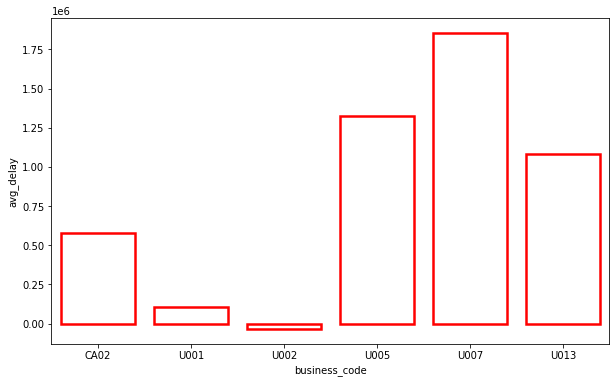

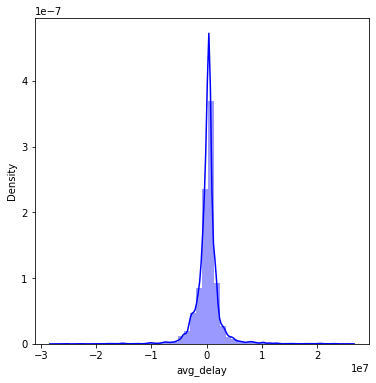

In [62]:
temp_graph=pd.DataFrame(maindata.groupby(['business_code'], axis=0, as_index=False)['avg_delay'].mean())

plt.figure(figsize=(10,6))
sns.barplot(x="business_code", y="avg_delay",data=temp_graph,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".4", edgecolor='red')

plt.figure(figsize=(6,6))
plt.figure(2)
sns.distplot(y['avg_delay'],color='blue')

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [63]:
x_train= pd.DataFrame(X_train.groupby(['name_customer'], axis=0, as_index=False)['doc_id'].count())

### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='count', ylabel='doc_id'>

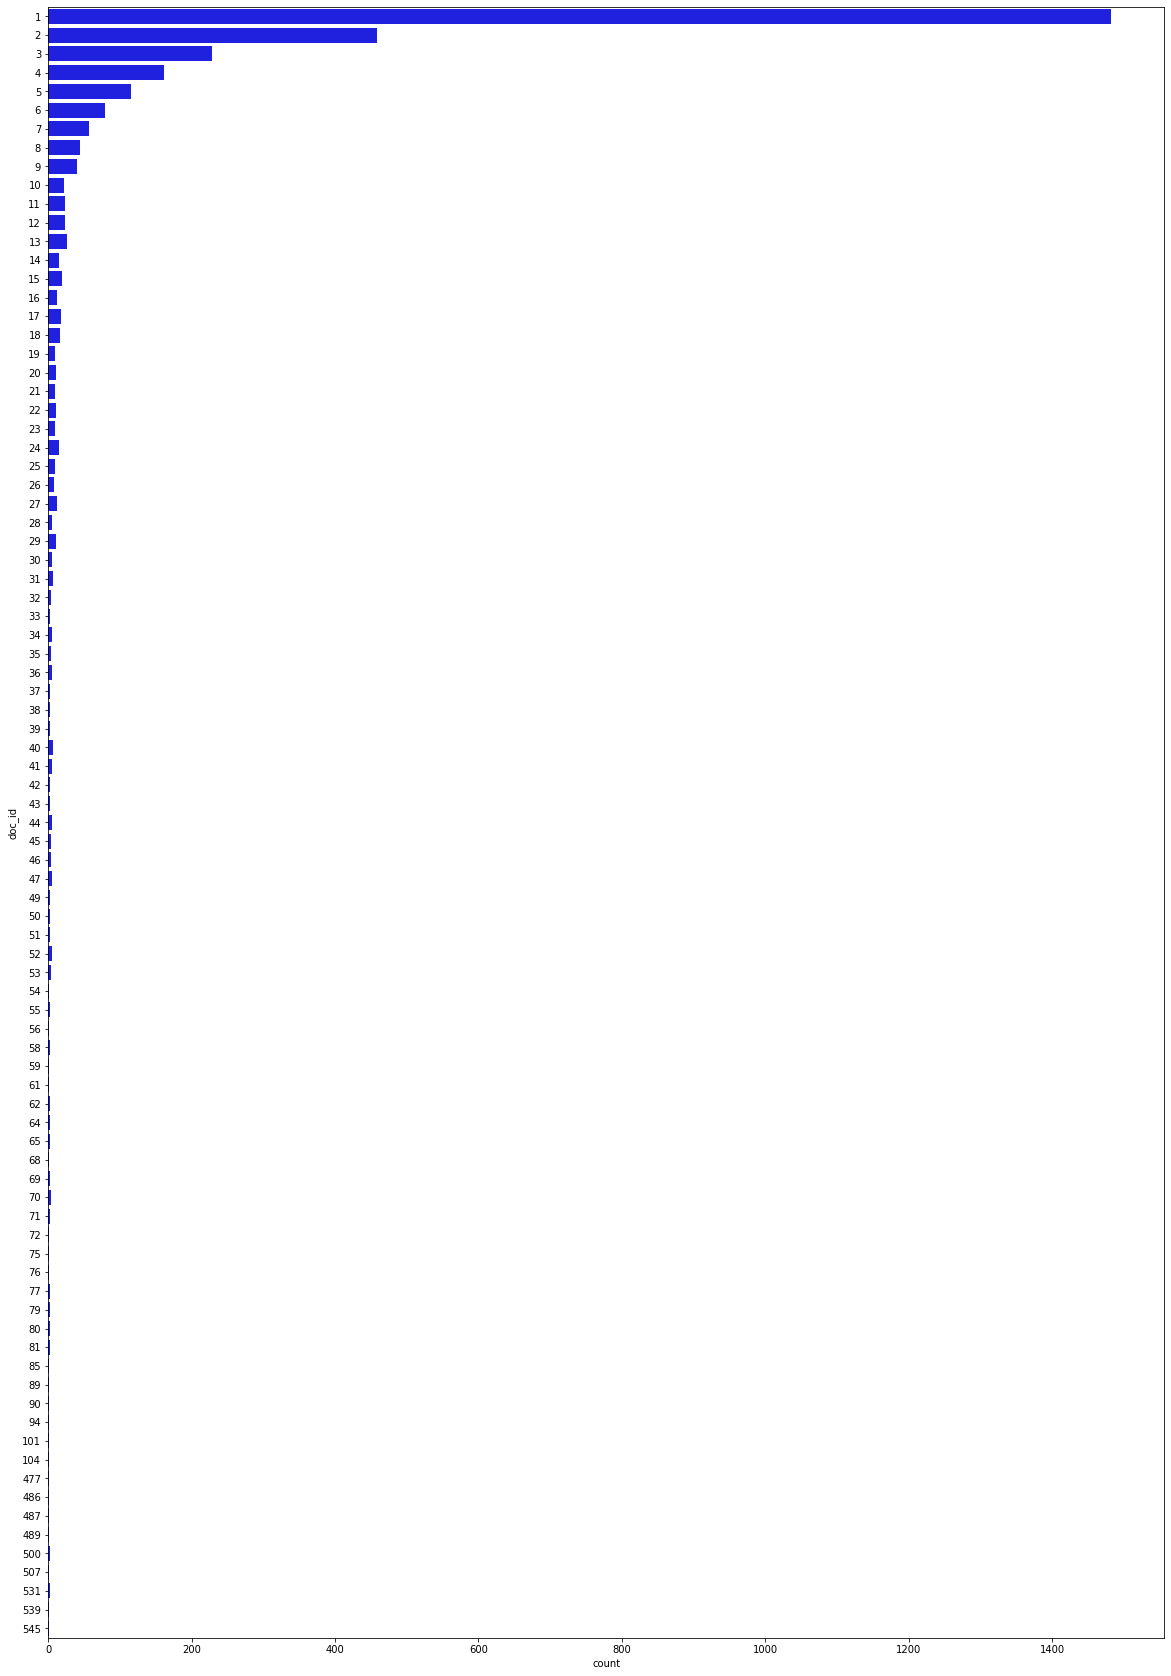

In [64]:
plt.figure(figsize=(20,30))
sns.countplot(y="doc_id", data=x_train, color="b")

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


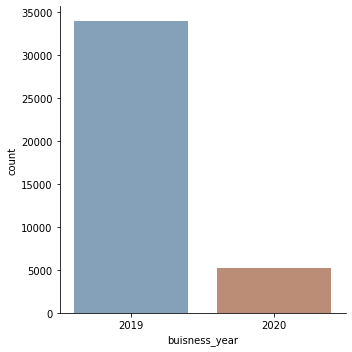

In [65]:
sns.catplot(x="buisness_year", kind="count", palette="twilight_shifted", data=maindata)

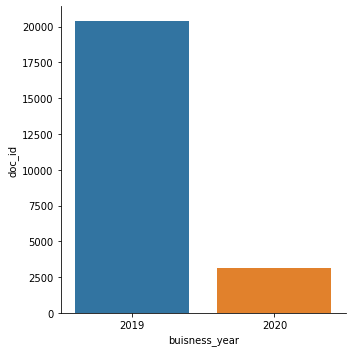

In [66]:
x_graph= pd.DataFrame(X_train.groupby(['buisness_year'], axis=0, as_index=False)['doc_id'].count())
sns.factorplot(x ='buisness_year', y ='doc_id', data = x_graph, kind ='bar')

# Feature Engineering 

### Display and describe the X_train dataframe 

In [67]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
45718,U001,200794332,COST foundation,2020,1930448249,2020-01-28,2020-02-12,2020-01-28,NAAX,36273.03
17966,U001,200706844,WINC trust,2020,1930517131,2020-02-13,2020-02-28,2020-02-13,NAA8,6349.27
21322,U001,200803720,DEC us,2019,1928589714,2019-08-01,2019-01-24,2019-01-01,NAM4,282.84
38919,U001,200752302,KROGER,2020,1930508809,2020-12-02,2020-02-27,2020-02-12,NAA8,64749.18
25191,U001,200974851,RESTA co,2019,1929483483,2019-12-06,2019-06-27,2019-06-12,NAA8,2066.63
...,...,...,...,...,...,...,...,...,...,...
26152,U001,200769623,WAL-MAR associates,2019,1930152454,2019-11-14,2019-11-29,2019-11-14,NAH4,3449.63
40790,U001,200793568,SUPE in,2019,1930222273,2019-06-12,2019-12-21,2019-12-06,NAA8,40591.75
38558,U001,100036066,GROC associates,2019,1929174676,2019-04-22,2019-05-07,2019-04-22,NAA8,24869.32
26776,U001,200769623,WAL-MAR associates,2019,1929555422,2019-06-28,2019-07-13,2019-06-28,NAH4,42362.89


In [68]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132247,2.014021e+09,31211.887272
std,0.338766,2.956842e+08,37042.176439
min,2019.000000,1.928502e+09,4.380000
25%,2019.000000,1.929174e+09,4652.319142
50%,2019.000000,1.929731e+09,17001.365000
75%,2019.000000,1.930209e+09,46270.849935
max,2020.000000,9.500000e+09,632134.240000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [69]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [70]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [71]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [72]:
X_train[['business_code', 'business_code_enc']]

,business_code,business_code_enc
45718,U001,1
17966,U001,1
21322,U001,1
38919,U001,1
25191,U001,1
...,...,...
26152,U001,1
40790,U001,1
38558,U001,1
26776,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [73]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [74]:
X_train, X_val, X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [75]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [76]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [77]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [78]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [79]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [80]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [81]:
X_train.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [82]:
X_val.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [83]:
X_test.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [84]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [85]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [86]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [87]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [88]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [89]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [90]:
print(X_train.dtypes)
print(X_val.dtypes)
print(X_test.dtypes)

cust_number                 int32
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object
cust_number                 int32
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64


# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [91]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [92]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [93]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [94]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [95]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_postingdate',
 'year_of_due',
 'year_of_createdate',
 'day_of_createdate',
 'month_of_due']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

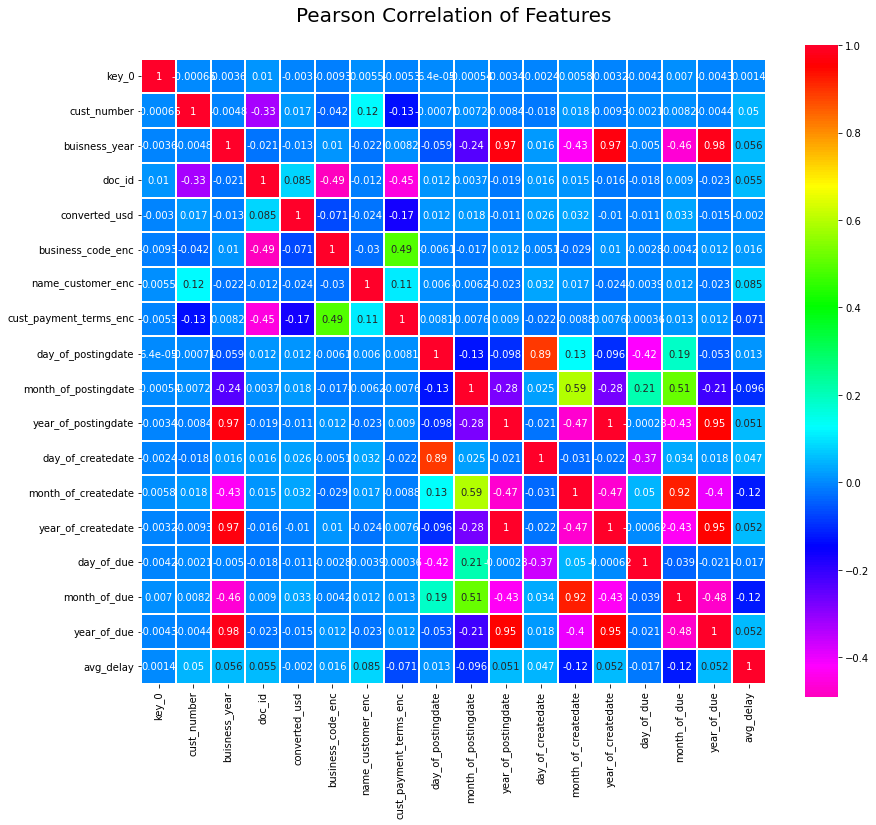

In [96]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [97]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [98]:
sel.variances_

array([1.81954912e+15, 1.14757386e-01, 8.74254278e+16, 1.37206443e+09,
       2.87927752e-01, 1.07015118e+06, 1.35481309e+02, 8.17239551e+01,
       1.19389088e+01, 1.14798749e-01, 7.70243713e+01, 1.22619699e+01,
       1.14937418e-01, 7.66173615e+01, 1.20665594e+01, 1.18125269e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'


- 'month_of_due'
- 'year_of_createdate'
- 'year_of_postingdate'
- 'day_of_createdate'
- 'year_of_due'


# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [99]:
MSE_Score = []
R2_Score = []
Huber_Loss = []
Quantile_Loss = []
Log_Cosh = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [100]:
y_test

,avg_delay
23619,-2.487273e+06
28084,6.024876e+05
36502,-2.592000e+05
38280,1.368960e+06
29218,-9.032727e+04
...,...
12492,-2.448000e+06
29953,4.774737e+04
49755,6.024876e+05
31243,4.050549e+05


### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)
predicted_train= regressor.predict(X_train)

In [102]:
x=pd.DataFrame(predicted,columns=['avg_delay_pred'])

In [115]:
y=pd.DataFrame(predicted_train,columns=['avg_delay_pred'])

In [103]:
x

,avg_delay_pred
0,1.279872e+06
1,3.145772e+05
2,-2.769268e+05
3,-2.254534e+05
4,5.205540e+05
...,...
7827,-1.347412e+05
7828,5.664081e+05
7829,2.275634e+05
7830,7.083196e+05


In [104]:
result = pd.concat([x['avg_delay_pred'], y_test['avg_delay']],axis=1)

In [ ]:
result_train=

In [105]:
result

,avg_delay_pred,avg_delay
0,1.279872e+06,NaN
1,3.145772e+05,NaN
2,-2.769268e+05,NaN
3,-2.254534e+05,NaN
4,5.205540e+05,4.160077e+05
...,...,...
29048,NaN,-5.832000e+05
12492,NaN,-2.448000e+06
29953,NaN,4.774737e+04
49755,NaN,6.024876e+05


In [106]:
list(y_test['avg_delay'])

[-2487272.727272727,
 602487.5912408751,
 -259200.00000000003,
 1368960.0,
 -90327.27272727201,
 527791.304347826,
 279776.18497109803,
 -3575314.2857142854,
 1689984.0,
 -700457.142857142,
 2013120.0000000002,
 -479852.30769230705,
 8337600.000000001,
 416497.86700125405,
 381927.272727272,
 93913.04347826,
 -2505600.0,
 -2686400.0,
 496800.00000000006,
 3499200.0,
 -677134.8837209301,
 -1365120.0,
 563375.3424657531,
 481521.95121951203,
 -1425600.0,
 -695414.634146341,
 -2686400.0,
 -990955.1020408161,
 53543.661971830006,
 2576290.909090909,
 261502.66512166802,
 1572896.385542168,
 300406.153846153,
 3782400.0000000005,
 416497.86700125405,
 -210409.411764705,
 1169157.44680851,
 416007.692307692,
 -2982938.613861386,
 554798.697068403,
 151200.0,
 -1569600.0,
 -897230.769230769,
 -913680.0,
 797929.4117647051,
 -210409.411764705,
 1123200.0,
 1209600.0,
 1663200.0,
 1133790.967741935,
 509881.690140845,
 -1084320.0,
 -2086243.902439024,
 -210409.411764705,
 -829028.571428571,
 45

[Text(0.5, 1.0, 'Linear Regression Model on Train Data'),
 Text(0.5, 0, 'Predicted Delay'),
 Text(0, 0.5, 'Actual Delay')]

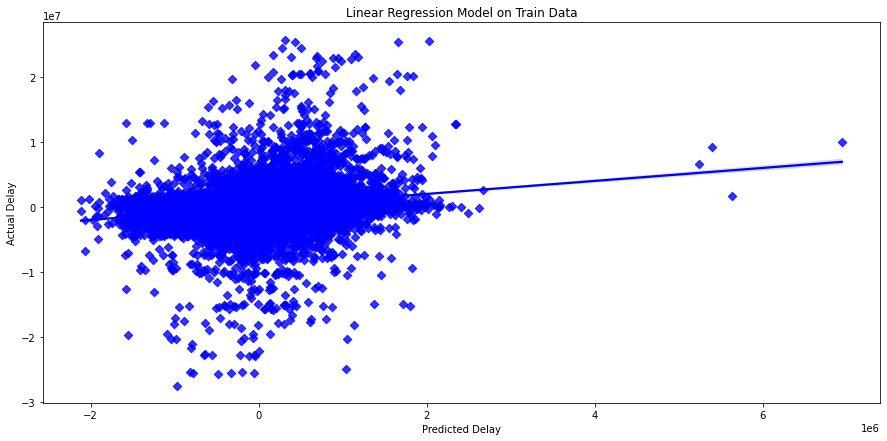

In [107]:
plt.figure(figsize=(15,7))
fig=sns.regplot(predicted_train,y_train,color='blue',marker='D')
fig.set(title='Linear Regression Model on Train Data',xlabel='Predicted Delay',ylabel='Actual Delay')

[Text(0.5, 1.0, 'Linear Regression Model on Test Data'),
 Text(0.5, 0, 'Predicted Delay'),
 Text(0, 0.5, 'Actual Delay')]

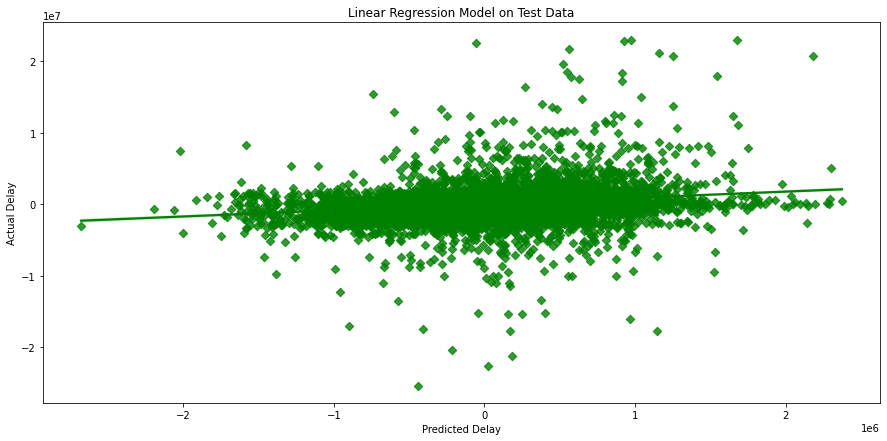

In [108]:
plt.figure(figsize=(15,7))
fig=sns.regplot(predicted,y_test,color='green',marker='D')
fig.set(title='Linear Regression Model on Test Data',xlabel='Predicted Delay',ylabel='Actual Delay')

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [120]:
MSE_Score.append(mean_squared_error(y_test, x))
R2_Score.append(r2_score(y_test, x))

In [121]:
y_test

,avg_delay
23619,-2.487273e+06
28084,6.024876e+05
36502,-2.592000e+05
38280,1.368960e+06
29218,-9.032727e+04
...,...
12492,-2.448000e+06
29953,4.774737e+04
49755,6.024876e+05
31243,4.050549e+05


In [125]:
len(predicted)

7832

In [126]:
def huber_fn(y_true, y_pred,delta=1.0):
#     threshold = 1
    error = y_true - y_pred
    abs_error = np.abs(error)
    quadratic = np.minimum(abs_error,delta)
    linear = abs_error - quadratic
    return np.mean(0.5*quadratic**2 + delta  * linear)


In [127]:
Huber_Score = huber_fn(y_test, predicted)

In [128]:
Huber_Loss.append(Huber_Score[0])

In [129]:
def quantile_loss(y_true, y_pred, quantile):
    error = y_true - y_pred
    return np.maximum(quantile*error,(quantile-1)*error).mean()

In [130]:
Quantile_Score = quantile_loss(y_test, predicted,0.5)

In [131]:
Quantile_Score[0]

639110.2569346691

In [132]:
Quantile_Loss.append(Quantile_Score[0])

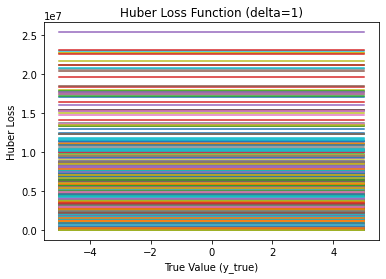

In [159]:

def huber_loss(y_true, y_pred, delta):
    """
    Huber loss function.
    """
    residual = np.abs(y_true - y_pred)
    quadratic = np.minimum(residual, delta)
    linear = (residual - quadratic)
    return 0.5 * quadratic ** 2 + delta * linear

# Create a range of values for y_true and y_pred
y_range = np.linspace(-5, 5, 100)

# Calculate the Huber loss for each pair of values with delta=1
delta = 1
huber_values = [huber_loss(y_test['avg_delay'],y_pred=0, delta=delta) for y in y_range]

# Plot the Huber loss values
plt.plot(y_range, huber_values)
plt.xlabel("True Value (y_true)")
plt.ylabel("Huber Loss")
plt.title(f"Huber Loss Function (delta={delta})")
plt.show()


In [172]:
def mse_loss(y_true, y_pred):
    """
    Mean Squared Error (MSE) loss function.
    """
    return np.mean((y_true - y_pred) ** 2)

# Create a list of true and predicted values

# Calculate the MSE for each pair of values
mse_values = [mse_loss(yt, yp) for yt, yp in zip(y_test['avg_delay'], x['avg_delay_pred'])]

# Create a pandas DataFrame of the MSE values
mse_df = pd.DataFrame({'True Value': list(y_test['avg_delay']), 'Predicted Value': list(x['avg_delay_pred']), 'MSE': mse_values})

mse_df


,True Value,Predicted Value,MSE
0,-2.487273e+06,1.279872e+06,1.419138e+13
1,6.024876e+05,3.145772e+05,8.289237e+10
2,-2.592000e+05,-2.769268e+05,3.142408e+08
3,1.368960e+06,-2.254534e+05,2.542154e+12
4,-9.032727e+04,5.205540e+05,3.731759e+11
...,...,...,...
7827,-2.448000e+06,-1.347412e+05,5.351166e+12
7828,4.774737e+04,5.664081e+05,2.690089e+11
7829,6.024876e+05,2.275634e+05,1.405682e+11
7830,4.050549e+05,7.083196e+05,9.196945e+10


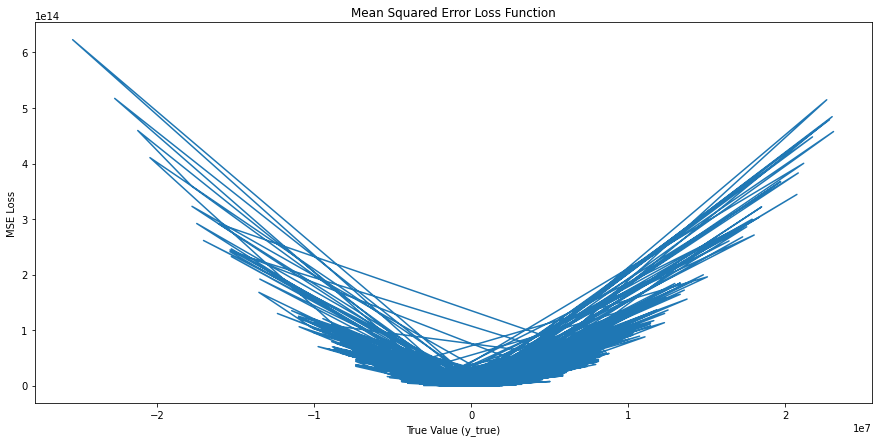

In [177]:
plt.figure(figsize=(15,7))

y_range = np.linspace(-5, 5, 100)
# Plot the MSE values
plt.plot(mse_df['True Value'], mse_df['MSE'])
plt.xlabel("True Value (y_true)")
plt.ylabel("MSE Loss")
plt.title("Mean Squared Error Loss Function")
plt.show()


In [146]:
mse_values

[avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 avg_delay_pred   NaN
 dtype: float64,
 avg_delay        NaN
 a

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score , Huber_Loss, Quantile_Loss, Log_Cosh:
    print(i,end=',')

In [ ]:
# HELL

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegression')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)
predicted_train= regressor.predict(X_train)

In [ ]:
predicted

In [ ]:
x=pd.DataFrame(predicted,columns=['avg_delay'])

In [ ]:
x.columns

In [ ]:
plt.figure(figsize=(15,7))
fig=sns.regplot(predicted_train,y_train,color='blue',marker='D')
fig.set(title='SVR Model on Train Data',xlabel='Predicted Delay',ylabel='Actual Delay')

In [ ]:
plt.figure(figsize=(15,7))
fig=sns.regplot(predicted,y_test,color='green',marker='D')
fig.set(title='SVR Model on Test Data',xlabel='Predicted Delay',ylabel='Actual Delay')

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
Huber_Score = huber_fn(y_test, x)

In [ ]:
Huber_Loss.append(Huber_Score[0])

In [ ]:
Huber_Loss

In [ ]:
Quantile_Score = quantile_loss(y_test, x,0.5)

In [ ]:
Quantile_Score[0]

In [ ]:
Quantile_Loss.append(Quantile_Score[0])

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score, Huber_Loss, Quantile_Loss:
    print(i,end=',')

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
predicted_train = regressor.predict(X_train)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
x=pd.DataFrame(predicted,columns=['avg_delay'])

In [ ]:
Huber_Score = huber_fn(y_test, x)

In [ ]:
Huber_Loss.append(Huber_Score[0])

In [ ]:
Huber_Loss

In [ ]:
Quantile_Score = quantile_loss(y_test, x,0.5)

In [ ]:
Quantile_Score[0]

In [ ]:
Quantile_Loss.append(Quantile_Score[0])

In [ ]:
plt.figure(figsize=(15,7))
fig=sns.regplot(predicted_train,y_train,color='blue',marker='D')
fig.set(title='Decision Tree Regression Model on Train Data',xlabel='Predicted Delay',ylabel='Actual Delay')

In [ ]:
plt.figure(figsize=(15,7))
fig=sns.regplot(predicted,y_test,color='green',marker='D')
fig.set(title='Decision Tree Regression Model on Test Data',xlabel='Predicted Delay',ylabel='Actual Delay')

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score,Huber_Loss, Quantile_Loss:
    print(i,end=',')

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
predicted_train = regressor.predict(X_train)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
x=pd.DataFrame(predicted,columns=['avg_delay'])

In [ ]:
Huber_Score = huber_fn(y_test, x)

In [ ]:
Huber_Loss.append(Huber_Score[0])

In [ ]:
Huber_Loss

In [ ]:
Quantile_Score = quantile_loss(y_test, x,0.5)

In [ ]:
Quantile_Score[0]

In [ ]:
Quantile_Loss.append(Quantile_Score[0])

In [ ]:
plt.figure(figsize=(15,7))
fig=sns.regplot(predicted_train,y_train,color='blue',marker='D')
fig.set(title='Random Forest Regression Model on Train Data',xlabel='Predicted Delay',ylabel='Actual Delay')

In [ ]:
plt.figure(figsize=(15,7))
fig=sns.regplot(predicted,y_test,color='green',marker='D')
fig.set(title='Random Forest Regression Model on Test Data',xlabel='Predicted Delay',ylabel='Actual Delay')

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score, Huber_Loss,Quantile_Loss:
    print(i,end=',')

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [ ]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
predicted_train = regressor.predict(X_train)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
x=pd.DataFrame(predicted,columns=['avg_delay'])

In [ ]:
Huber_Score = huber_fn(y_test, x)

In [ ]:
Huber_Loss.append(Huber_Score[0])

In [ ]:
Huber_Loss

In [ ]:
Quantile_Score = quantile_loss(y_test, x,0.5)

In [ ]:
Quantile_Score[0]

In [ ]:
Quantile_Loss.append(Quantile_Score[0])

In [ ]:
plt.figure(figsize=(15,7))
fig=sns.regplot(predicted_train,y_train,color='blue',marker='D')
fig.set(title='XGBoost Regression Model on Train Data',xlabel='Predicted Delay',ylabel='Actual Delay')

In [ ]:
plt.figure(figsize=(15,7))
fig=sns.regplot(predicted,y_test,color='green',marker='D')
fig.set(title='XGBoost Regression Model on Test Data',xlabel='Predicted Delay',ylabel='Actual Delay')

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score,Quantile_Loss:
    print(i,end=',')

## You need to make the comparison list into a comparison dataframe 

In [ ]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score, Huber_Loss,Quantile_Loss)), columns = ['Algorithm', 'MSE_Score', 'R2_Score', 'Huber_Loss','Quantile_Loss']).astype('str')
Comparison

## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [ ]:
mean_squared_error(y_test,predictedfinal,squared=False)

### Calculate the mean Square Error for validation dataset

In [ ]:
mean_squared_error(y_val,predict_testfinal,squared=False)

### Calculate the R2 score for test

In [ ]:
r2_score(y_test, predictedfinal)

### Calculate the R2 score for Validation

In [ ]:
r2_score(y_val, predict_testfinal)

### Calculate the Accuracy for train Dataset 

In [ ]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
xgboost_model_accuracy = round(regressor.score(X_train, y_train)*100,2)
print(round(xgboost_model_accuracy,2))

### Calculate the accuracy for validation

In [ ]:
regressor = xgb.XGBRegressor()
regressor.fit(X_val, y_val)
xgboost_model_accuracy = round(regressor.score(X_val, y_val)*100,2)
print(round(xgboost_model_accuracy,2))

### Calculate the accuracy for test

In [ ]:
regressor = xgb.XGBRegressor()
regressor.fit(X_test, y_test)
xgboost_model_accuracy = round(regressor.score(X_test, y_test)*100,2)
print(round(xgboost_model_accuracy,2))

## Specify the reason behind choosing your machine learning model 

XGBOOST has got the least MSE_Score.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [ ]:
nulldata

### Check for the number of rows and columns in the nulldata

In [ ]:
nulldata.shape

### Check the Description and Information of the nulldata 

In [ ]:
print(nulldata.describe())
nulldata.info()

### Storing the Nulldata into a different dataset 
# for BACKUP

In [ ]:
nulldata1=nulldata.copy(deep=True)

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [ ]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [ ]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] =nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year


nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year


nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [ ]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])

### Check for the datatypes of all the columns of Nulldata

In [ ]:
nulldata.dtypes

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [ ]:
nulldata.drop(columns=['business_code', 'baseline_create_date', 'posting_date', 'name_customer', 'clear_date', 'cust_payment_terms', 'day_of_cleardate', 'month_of_cleardate', 'year_of_cleardate'], inplace=True)

### Check the information of the "nulldata" dataframe

In [ ]:
nulldata.info()

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [ ]:
print(X_test.info())
nulldata.info()

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [ ]:
X_test.columns

In [ ]:
nulldata.columns

In [ ]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [ ]:
nulldata2

### Now you can pass this dataset into you final model and store it into "final_result"

In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [ ]:
final_result

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [ ]:
Final

### Check for the Number of Rows and Columns in your "Final" dataframe 

In [ ]:
Final.shape

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [ ]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [ ]:
Final['clear_date']

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [ ]:
final_result

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:
bins=  [0,15,30,45,60,100]
labels =['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [ ]:
Final.drop(columns=['key_0', 'avg_delay'], inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [ ]:
print(Final['Aging Bucket'].value_counts())

### Display your final dataset with aging buckets 

In [ ]:
Final

### Store this dataframe into the .csv format

In [ ]:
Final.to_csv("HRC20460W_VINAY_RANA.csv")

# END OF THE PROJECT